In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(None)

In [69]:
class Perceptron:
    def __init__(self, alpha, hid_layer):
        self.alpha = alpha
        self.act_f = np.vectorize(lambda s: 1.0/(1+np.math.exp(-2.0*alpha*s)))
        
        self.w_hid = np.random.rand(hid_layer)
        self.w_last = np.random.rand(hid_layer)
    
    def fit(self, test_inputs, test_outputs, epoches, step, inert):
        self.epoches = epoches
        self.delta_w_last = 0
        self.delta_w_hid = 0
        
        for epoch in range(self.epoches):
            err = 0.0
            for t_inp, t_outp in zip(test_inputs, test_outputs):
                outp = self.predict(t_inp)
                err += np.linalg.norm(outp - t_outp)
                
                delta_last = -outp*(1 - outp)*(t_outp - outp)
                delta_hid = self.outps_hid*(1 - self.outps_hid)*delta_last*self.w_last
                
                self.delta_w_last = inert*self.delta_w_last + (1 - inert)*step*delta_last*self.outps_hid
                self.delta_w_hid  = inert*self.delta_w_hid + (1 - inert)*step*delta_hid*t_inp
                
                self.w_last += self.delta_w_last
                self.w_hid += self.delta_w_hid            
                
        print "Epoch {}, Error = {}".format(epoch, err)
    
    def predict(self, x):
        self.outps_hid = self.act_f(x*self.w_hid)
        return (np.sum(self.outps_hid * self.w_last))

In [173]:
a, b, n = 0, 10, 20

mu = 0
sigma = 0.5

f = np.vectorize(lambda x: b-x)
rands = np.random.normal(mu, sigma, size=n)

Epoch 999, Error = 20.2800561889


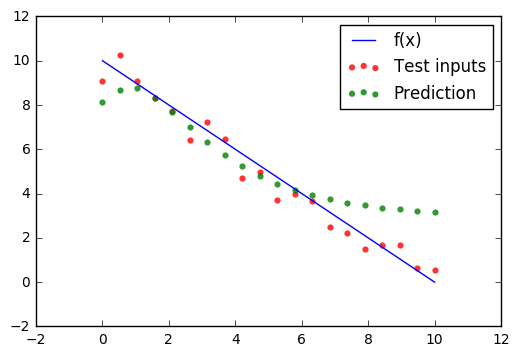

In [178]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = Perceptron(1, 50)
nn.fit(test_inp, test_outp, 1000, 1e-5, 0.5)
predictions = np.array([nn.predict(x) for x in test_inp])

plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(test_inp, test_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend()
plt.show()

In [160]:
a, b, n = 0, 10, 20

mu = 0
sigma = 0.5

f = np.vectorize(lambda x: x)
rands = np.random.normal(mu, sigma, size=n)

Epoch 999, Error = 27.2420779222


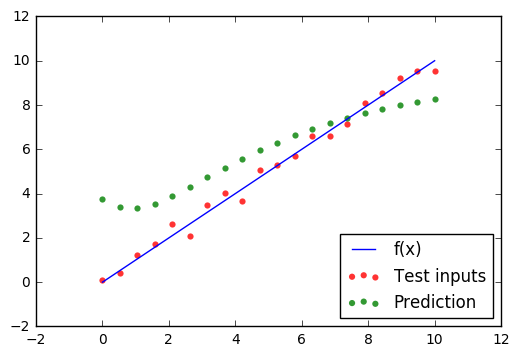

In [171]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = Perceptron(1, 50)
nn.fit(test_inp, test_outp, 1000, 1e-5, 0.5)
predictions = np.array([nn.predict(x) for x in test_inp])

plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(test_inp, test_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend(loc=4)
plt.show()